In [25]:
import tensorflow as tf
from tensorflow import keras

In [26]:
fashion_mnist = keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


In [27]:
X_train_full.shape

(60000, 28, 28)

In [28]:
X_train_full.dtype

dtype('uint8')

In [58]:
#### the dataset is already split into training set and test set, there is no validation set
# we'll create a new validation set

X_valid, X_train, = X_train_full[:5000] / 255.0, X_train_full[5000:] / 255.0
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]

In [59]:
#defining names for each class

class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [60]:
class_names[y_train[0]]

'Coat'

In [61]:
## Classification MLP with two hidden layers

# sequetial model is a simple keras model for NN that are composed of a single stack 
# of layers connected sequentially

#Sequential is an API 
model = keras.models.Sequential()
### first hidden layer with pixel being 28 by 28 = 784
# the flatten layer is to convert each input image into a 1D array
# since its the first layer, you should specify the input_shape 
# input layer 
model.add(keras.layers.Flatten(input_shape =[28,28]))

# add a dense hidden layer with 300 neurons, with a ReLU activation function 
# each dense layer manages its own weight matrix, containing all the connection weights
# between the neurons and their inputs. 
model.add(keras.layers.Dense(300, activation = 'relu'))

# second hidden layer with 100 neurons with another ReLU activation function
model.add(keras.layers.Dense(100, activation = 'relu'))

# add a dense output layer with 10 neurons (one per class), using a softmax activation function 
model.add(keras.layers.Dense(10, activation = 'softmax'))



In [62]:
### displaying all the model's layer, including each layers name, its output shape
# number of parameters. The summary ends with the ottal number of paramers, including
# trainable and non-trainable parameters

In [63]:
model.summary()

# second layer has 235,500 becasue 28 * 28 * (30) =235200 + 300 bias = 235,500 

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_5 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_10 (Dense)             (None, 300)               235500    
_________________________________________________________________
dense_11 (Dense)             (None, 100)               30100     
_________________________________________________________________
dense_12 (Dense)             (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [64]:
model.layers

In [65]:
hidden1 = model.layers[1]
hidden1.name

'dense_10'

In [69]:
model.get_layer('dense_10') is hidden1

True

In [70]:
# all the parameters of a layer can be accessed
# for a Dense Layer, it includes both the connection weights and bias terms 

# shape of the weight matrix depends on the number of input
weights, biases = hidden1.get_weights()
weights

array([[ 0.0614499 , -0.03255781,  0.00223378, ...,  0.03821967,
        -0.01675514,  0.02194966],
       [ 0.0390401 , -0.01045639, -0.03525764, ...,  0.02039461,
         0.0266479 ,  0.02152006],
       [ 0.03231631, -0.02395875, -0.04539245, ..., -0.01263544,
         0.03494162, -0.0313    ],
       ...,
       [-0.04043998,  0.0263494 ,  0.05511525, ..., -0.06295386,
         0.05898203, -0.02254425],
       [-0.05164579,  0.01479275,  0.07125168, ...,  0.03601222,
         0.02103835, -0.01050182],
       [ 0.04186168, -0.00817921, -0.05671031, ...,  0.07277563,
         0.00686546, -0.00680415]], dtype=float32)

In [71]:
biases

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [72]:
weights.shape

(784, 300)

In [73]:
biases.shape

(300,)

In [74]:
### COMPILING THE MODEL

# after themodel is created, you define the loss function and the optimizer

# loss is defined because we have sparse label
# optimizer is defined as stochastic Gradient Descent using backpropogation
# when using SGD optimmizer, you must identify the learning rate by the following 
# optimizer = keras.optimizers.SGD(lr = 0.01)
#the one below is by default a 0.01 learning rate
model.compile(loss = 'sparse_categorical_crossentropy',
              optimizer = 'sgd',
              metrics = ['accuracy'])

In [75]:
## TRAINING AND EVALUATING THE MODEL 

# we pass it the input features (X_train) and the target classes (y_train)
# defined the number of epochs
# set a validation (it's optional)
# Keras will measure the loss and other metrics at the end of each epochs
#if the performance on the training set is better than the validation set -- youre overfitting


history = model.fit(X_train,
                    y_train,
                    epochs= 30,
                    validation_data=(X_valid, y_valid))

Train on 55000 samples, validate on 5000 samples
Epoch 1/30
55000/55000 [==============================] - 5s 97us/sample - loss: 1.4711 - acc: 0.5934 - val_loss: 1.0066 - val_acc: 0.6968
Epoch 2/30
55000/55000 [==============================] - 4s 78us/sample - loss: 0.8818 - acc: 0.7190 - val_loss: 0.7759 - val_acc: 0.7446
Epoch 3/30
55000/55000 [==============================] - 4s 81us/sample - loss: 0.7368 - acc: 0.7594 - val_loss: 0.6823 - val_acc: 0.7802
Epoch 4/30
55000/55000 [==============================] - 4s 79us/sample - loss: 0.6633 - acc: 0.7855 - val_loss: 0.6259 - val_acc: 0.8000
Epoch 5/30
55000/55000 [==============================] - 4s 78us/sample - loss: 0.6151 - acc: 0.7998 - val_loss: 0.5863 - val_acc: 0.8110
Epoch 6/30
55000/55000 [==============================] - 4s 78us/sample - loss: 0.5808 - acc: 0.8088 - val_loss: 0.5585 - val_acc: 0.8204
Epoch 7/30
55000/55000 [==============================] - 4s 78us/sample - loss: 0.5548 - acc: 0.8161 - val_loss: 0.5

In [78]:
history.params
#batch_size by default is 32

{'batch_size': 32,
 'epochs': 30,
 'steps': None,
 'samples': 55000,
 'verbose': 0,
 'do_validation': True,
 'metrics': ['loss', 'acc', 'val_loss', 'val_acc']}

In [79]:
history.history

{'loss': [1.4710805988918652,
  0.88179042597684,
  0.7367592792597684,
  0.6632616600470109,
  0.6151048245863481,
  0.5807900274883617,
  0.5548430873914199,
  0.5346934835000472,
  0.5185092598958448,
  0.5050240667213093,
  0.4935697975505482,
  0.4838099684715271,
  0.4753236414215781,
  0.4680714136903936,
  0.46125665350393813,
  0.45502637178681116,
  0.44960191859332,
  0.44481787250258703,
  0.4398546092423526,
  0.4357699431636117,
  0.4315146349863573,
  0.42791244333223866,
  0.42403763707767833,
  0.4206726028268987,
  0.4175426039435647,
  0.4143035936832428,
  0.4115513803352009,
  0.40874608635902404,
  0.4062524888472124,
  0.4033046832279725],
 'acc': [0.5933818,
  0.7189818,
  0.75943637,
  0.78547275,
  0.7997818,
  0.8087818,
  0.8160909,
  0.8207273,
  0.8252182,
  0.8286545,
  0.83156365,
  0.8347273,
  0.8372909,
  0.83918184,
  0.84096366,
  0.84327275,
  0.84505457,
  0.8460909,
  0.8483818,
  0.84965456,
  0.85156363,
  0.8519818,
  0.8530727,
  0.8545455,
 

In [80]:
import pandas as pd

In [81]:
import matplotlib.pyplot as plt

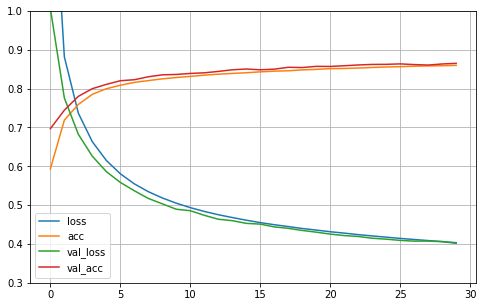

In [87]:
# training and accuracy during the training are relatively close (which means not too much overfitting)

pd.DataFrame(history.history).plot(figsize = (8,5))
plt.grid(True)
plt.gca().set_ylim(0.3,1)
plt.show()

In [88]:
# if youre unstatified with your model, tune the hyperparameters

In [89]:
# once you are satisfied with your model validation accuracy, you should evaluate if on the testing set
# using the evaluate() method

model.evaluate(X_test, y_test)

10000/10000 [==============================] - 0s 44us/sample - loss: 2.9302 - acc: 0.8155


[2.930175337266922, 0.8155]

In [96]:
# USING MODEL TO MAKE PREDICTIONS

X_new = X_test[:3]
y_proba = model.predict(X_new)
y_proba.round(2)

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [98]:
# classifying with the highest estimated probability, then use predict_classes() method
y_pred = model.predict_classes(X_new)
print(y_pred)
np.array(class_names)[y_pred]

[9 2 1]


array(['Ankle boot', 'Pullover', 'Trouser'], dtype='<U11')

In [100]:
# the ACTUAL classififed images
y_new = y_test[:3]
y_new

# since they match from the training model, it is correct 

array([9, 2, 1], dtype=uint8)